# Customer Retention Analysis
Business can thrive and dive depending upon how happy your customers are, how loyal they are, and how willing they are to keep buying your services. Loyal customers are worth up to 10 times as much their first purchase and it is 6 to 7 times more expensive to land a new customer than to keep a current one. 

This project is aimed to

1. Understand the causes and/or scenarios causing attrition of customers 
2. Provide a predictive model that ranks the customers 
3. Learn the factors which are strongly correlated with churn rate 
4. Make recommendations to minimize the revenue loss 



# Dataset
In this project We will be using the [Telco Customer Churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) to study the customer behavior in order to develop focused customer retention programs.

This dataset has 7043 samples and 21 features, the features includes 

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Questions we will try to answer during this project

1. Which variables influences if the client will leave? 
2. What are the most important variables to look?
3. Which clients have the highest chance of leaving?

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

# Data Ingestion

In [225]:
#Loading the data
df = pd.read_excel("Customer-Churn-Dataset.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [226]:
df.shape

(7043, 21)

In [227]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [228]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.45       5
20.3        5
19.95       4
69.6        4
19.3        4
19.85       4
74.7        4
70.6        4
69.9        4
44          4
19.4        4
50.15       4
19.5        4
20.35       4
49.9        4
19.2        4
20.4        4
75.3        4
69.65       4
           ..
1345.85     1
6792.45     1
762.45      1
6794.75     1
761.85      1
6743.55     1
1348.9      1
6741.15     1
6717.9      1
6705.7      1
4447.75     1
6707.15     1
2917.65     1
62.9        1
6710.5      1
6713.2      1
914         1
6716.45     1
63.15       1
742.9       1
6719.9      1
139.25      1
265.75      1
6725.5      1
2603.3      1
743.05      1
6733        1
4443.45     1
6735.05     1
4764        1
Name: TotalCharges, Length: 6531, dtype: int64

**Since we have 11 missing values in variable 'TotalCharges', so we will replace these empty spaces ith NA values.**

In [229]:
#Replacing empty spaces with Null values
df = df.replace(r'^\s+$', np.nan, regex=True)

In [230]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
45.30       7
19.55       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
69.95       4
69.90       4
19.85       4
69.60       4
44.40       4
69.65       4
19.50       4
19.20       4
19.95       4
49.90       4
20.50       4
20.35       4
70.60       4
44.00       4
50.15       4
19.40       4
75.30       4
74.70       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [232]:
df['TotalCharges'].isnull().sum()

11

**Now all the empty spaces are removed from the dataset, now the dataset is almost complete so I will drop the few NA rows that has Null values**

In [233]:
# Dropping NA values
df = df.dropna()

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Visualizing the missingness of data

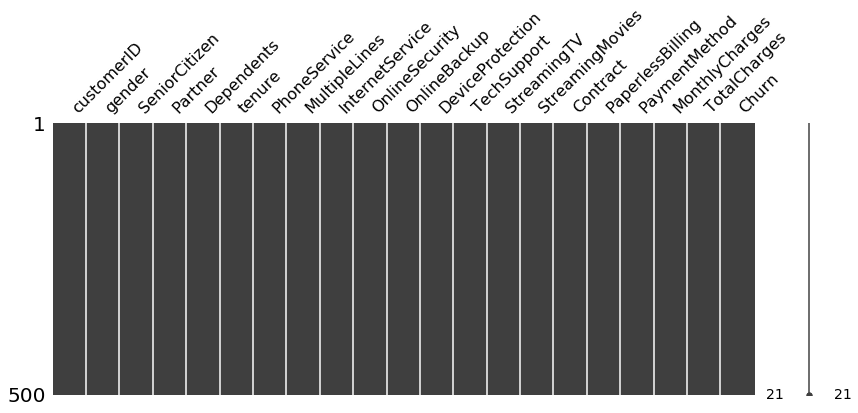

In [235]:
# Matrix of missingness of the data
missingness=msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

**Now the dataset is completely clean and we can start our analysis, but before diving into further analysis let us change the 'SeniorCitizen' variable from interger to categorial as this variable signifies the status of seniority of the customer**

In [236]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen'])

**So until now I have checked the size of my dataset,'CustomerId' is specific and unique to every row and it doesn’t help to predict if the client is going to Churn. So we will delete the CustomerID.**

In [237]:
# Deleting the custumerID column
del df["customerID"]

# Intial Analysis

# Lets split the dataset into numeric and objects to facilitate the analysis

In [238]:
#Splitting data according to datatypes
num = ['float64', 'int64']
num_df = df.select_dtypes(include=num)
obj_df = df.select_dtypes(exclude=num)

In [239]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [240]:
obj_df.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [241]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

**The above gives us the idea that how the data is, and now we move further to understand correlation between variables.**

# Univariate Distribution

Now let us consider the numeric variables , how they are distributed and how they are related to each other and also how they can help in to predict the 'Churn' variable.

**To see the distribution we will use Boxplots and Histograms**

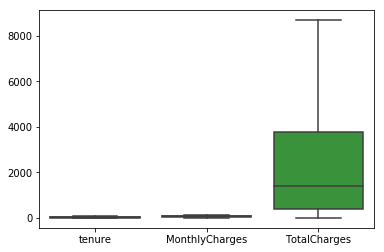

In [242]:
sns.boxplot(data = num_df)

[]

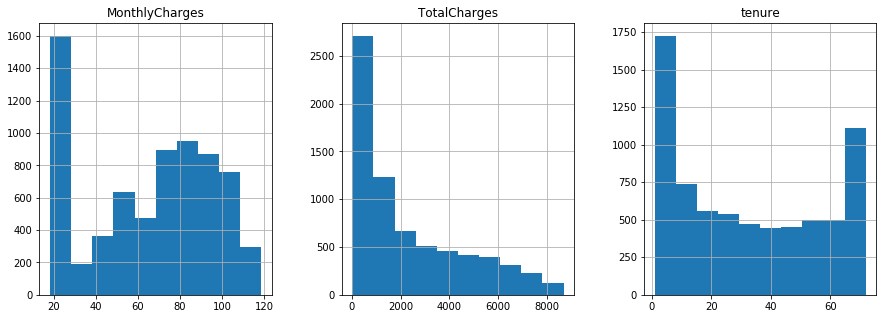

In [243]:
# histogram plots
num_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()

The above two plots shows that the numeric variables are not normally distributed , lets check how they are related to the variable we are trying to predict.

**Lets add the 'Churn' variable in numeric dataset**

In [244]:
num_df = pd.concat([num_df,df["Churn"]],axis=1)

In [245]:
num_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


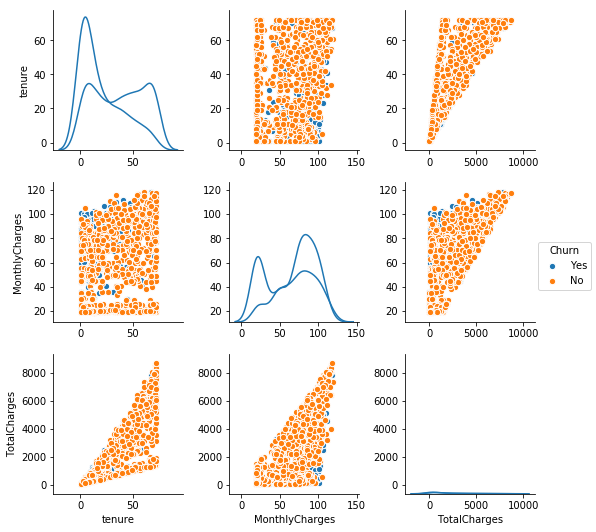

In [246]:
#Plotting pair plot to identify relationship between 'Churn' and other variables
g = sns.PairGrid(num_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

From the above plots 'tenure' and 'MonthlyCharges' are looking good predictors of the 'Churn' variable

Now lets divide the three numerical variables into bins and try to plot separately to identify the low Churn areas and high Churn areas.

We will use violin plots to decide bins of the numerical variables that we are going to use.

# Bivariate Distribution

Bivariate Distribution will allow us to identify how each numeric variable is distributed with respect to target variable 'Churn'

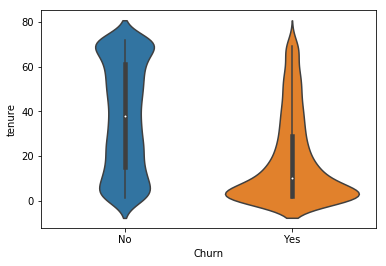

In [247]:
sns.violinplot(x="Churn", y="tenure", data=num_df);

**The above plot gives us the idea of size of bins for variable 'tenure'**

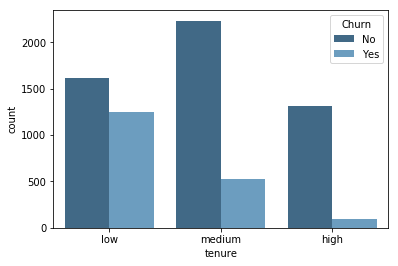

In [248]:
#Creating bins and plotting Countplot for 'tenure'
tenure_bins=pd.cut(num_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'tenure' variable with respect to target variable 'Churn'**

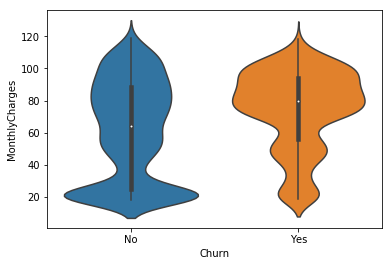

In [249]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=num_df);

**The above plots gives us the idea of size of bins for variable 'MonthlyCharges'**

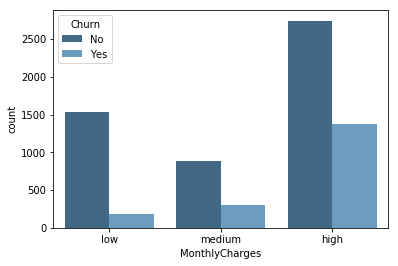

In [250]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
MonthlyCharges_bins=pd.cut(num_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'MonthlyCharges' variable with respect to target variable 'Churn'**

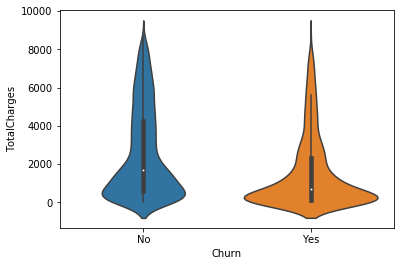

In [251]:
sns.violinplot(x="Churn", y="TotalCharges", data=num_df);

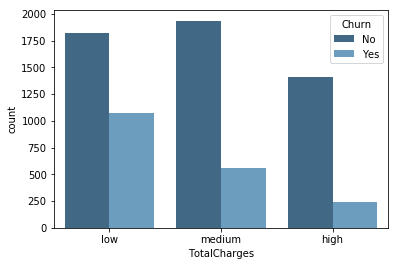

In [252]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
TotalCharges_bins=pd.cut(num_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'TotalCharges' variable with respect to target variable 'Churn'**

I divided all three numerical variables in 3 bins according to the violin plot trying to separate then in a way to distinguish the low churn rate areas from the high churn rate areas and you can see from the count plots how the distribution is different in each bin.

Since the distribution is different in each bin, we will save them into another datframe

In [253]:
#Saving bins into dataframe
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

**From the above plots following can be deducted:**
    
    1. Less than a year tenure category has highest churn
    2. Customers paying high Monthly charges tends to churn more
    3. 2 to 5 years tenure category results in highest revenue loss
    4. There is not much variation in medium bin which means customer remain loyal as they cross a year
    
> * From the above distribution we also concluded that **TotalCharges is almost = tenure * MothlyCharges**
> * Hence TotalCharges is Redundant should not be considered in further analysis

# Numerical vs Categorical Variables

We will plot numeric and categorical variables to explore the dependency of variables on each other.

Since there are too many categorical variables , we will split them into 3 different sets and then plot each set with the numerical variables

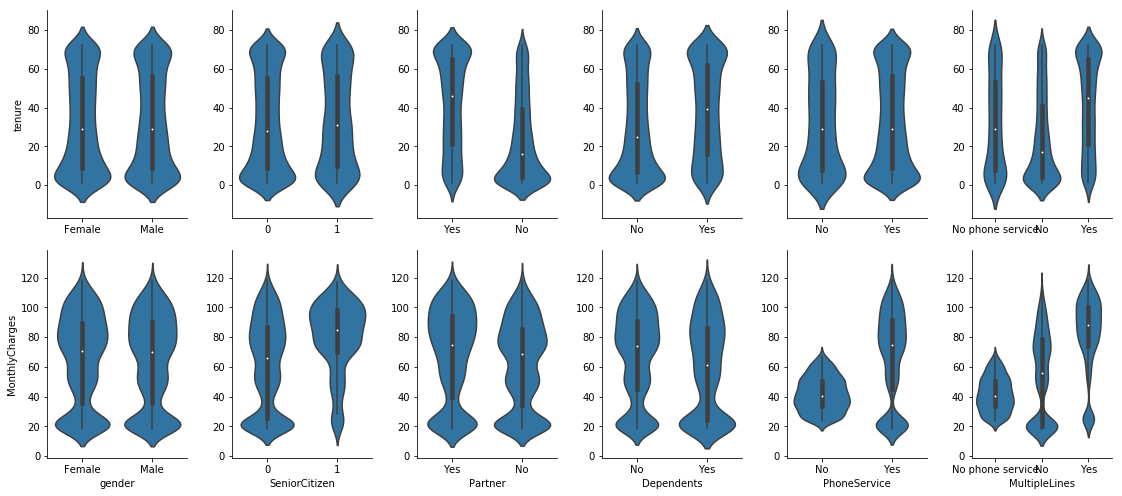

In [254]:
#Splitting the first set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[0:6].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

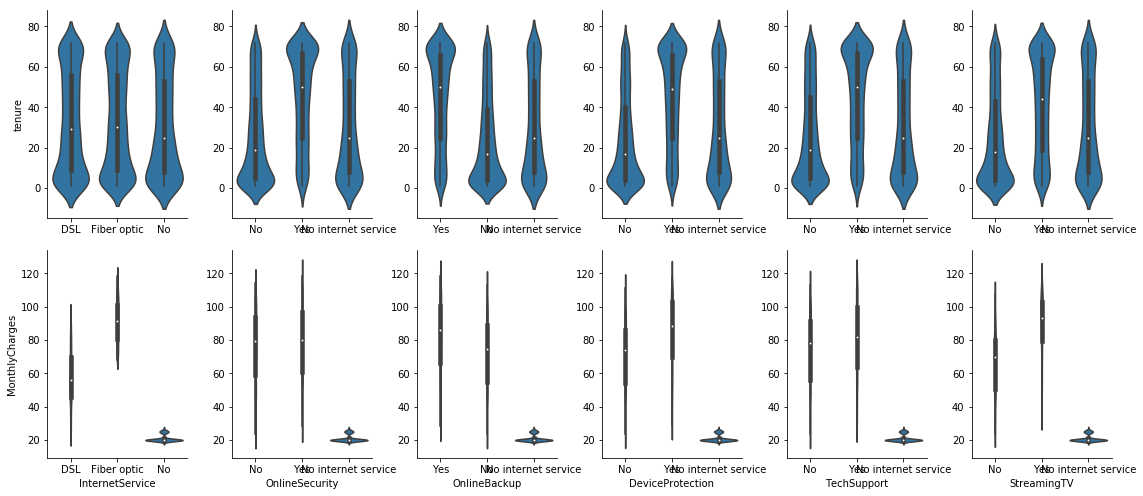

In [255]:
#Splitting the second set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[6:12].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

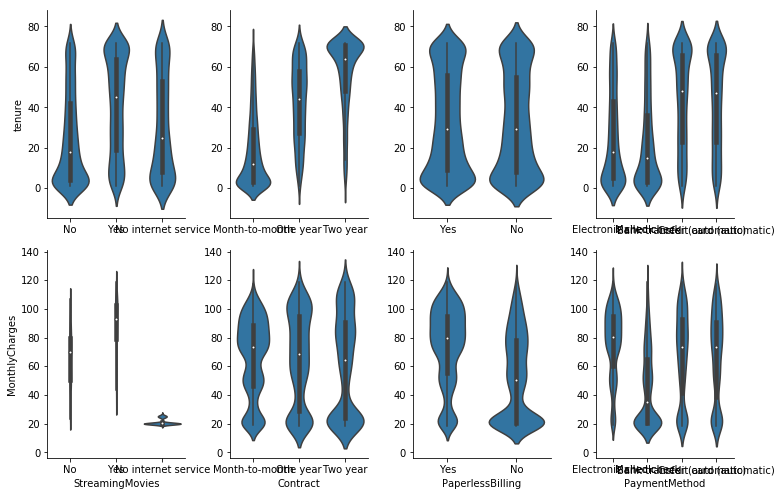

In [256]:
#Splitting the third set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[12:16].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

**From the above plots following can be deducted:**
    
    1. Customers with Eledtronic or Mailed check payment method have a lower tenure
    2. Variable like gender does not influence tenure and monthly payment 
    3. Also the importance of Fibre optic service on monthly revenue is very clear
    
> * The above conclusions from the plots are very important to design the campaigns for the firm to focus on the specific areas which needs to be enhanced in terms of service quality or affordable price to reduce the customer's churn rate. 


**But we still don’t know the variables that influences the most so we can focus on the variables that will give us the best return and we also would like to know the clients with the highest chance of leaving.**

# So now lets focus on categorical values

Our main aim for Categorial plots is to get the probability of churn for each attribute value and how it varies with number of customers

Now to get an idea of the strongest variables that indicates if the client will leave and in what proportion that means how much the total client they represent, we will plot each variable as a bar plot.

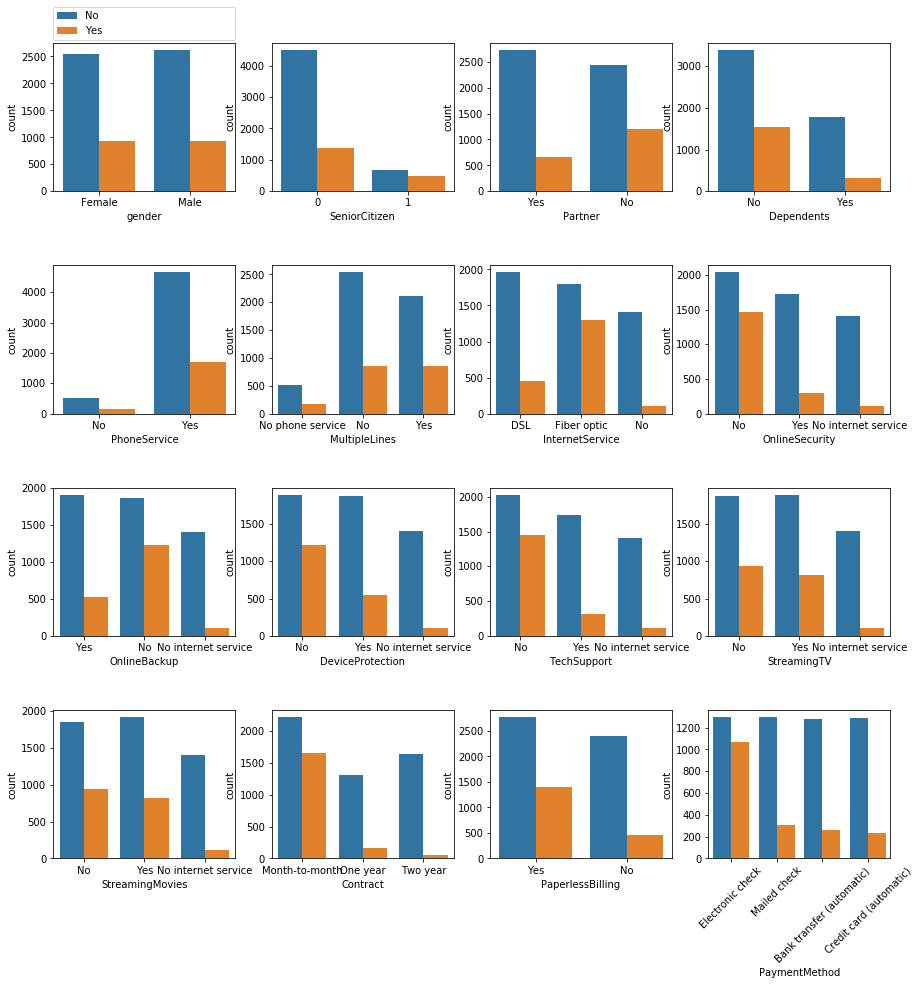

In [257]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=obj_df.iloc[:,i], hue=obj_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
   tick.set_rotation(45)

The above plots gives us a better picture of variables that are more important such as

    1. Month-to-month contract is a strong indicator if the client might leave
    2. Electronic check payment method also provide clear view to the client stability
    3. On the other hand Senior citizen is a good predictor but only represents a small amount of clients
    
**SO we need to focus on the variables that delivers best results in terms of Churn of company clients**

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

In the dataset:
    
* There are columns with a scope of transformation, like SeniorCitizen
* There is no null data in the dataset as it has been removed intially
* Variable like CustomerId is redundant as it does not help in prediction of the churn of the clients




In [268]:
#Converting SeniorCitizen variable into categorical and mapping values of Yes & No to 1 & 0 respectively
df['SeniorCitizen'] = df.SeniorCitizen.map({0:'No', 1:'Yes'})

**So for the first two points above ,transformation of SeniorCitizen variable is done from integer to Categorical, Null values are deleted from the data intially and CutomerId has also been removed while Univariate analysis of variables.**

**Now, no more trabsformation of features are required.**

# Machine Learning Models

In this part we will build the machine learning models to predict the ‘Churn’ variable based on the clients features

First we will concatenate the numerical variables bins with the categorical variables, after we need to transform the categorical variables into binary vectors and then we will split the dataset into training and test

In [269]:
# Concatenate bins with object variables
df=pd.concat([bins,obj_df],axis=1)

# Convert all the variables into categorical
for i in list(df.columns):
    df[i] = pd.Categorical(df[i]) 
dummy = pd.get_dummies(df) # Transform the categorical variables into dummy variables

In [270]:
df.head(10)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,low,low,low,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,medium,medium,medium,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,low,medium,low,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,medium,medium,medium,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,low,high,low,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,low,high,low,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,medium,high,medium,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,low,low,low,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,medium,high,medium,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,high,medium,medium,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


# Split training and testing dataset

 I am splitting our training set here to 80% for training and 20% for validation since we have a separate test data.

In [271]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Training Models

We will try following models for prediction
    
* Logistic Regression
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier






For compairing different models we will use Kfold method and will use the best model to predict the teat data

In [273]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.800179 (0.012824)
KNN: 0.765153 (0.010409)
CART: 0.728533 (0.016211)
RF: 0.764264 (0.013064)


From the above matrix Logistic Regression looks like the best option.

Now using Logistic Regression model on validation data

In [274]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.794598436389
[[918  99]
 [190 200]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1017
          1       0.67      0.51      0.58       390

avg / total       0.78      0.79      0.79      1407



Tha bove metrics shows that our model have good overall prediction,  however what is more important is not to predict exactly the clients that will leave but to have the probability of the client leaving or not

We can get some information from this model about the features that are most important, for which we will look for the coefficients of the model

# Feature Importance

In [275]:
#Checking for coefficients of the variables and sorting them 
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.350954,Contract_Month-to-month
23,0.292869,InternetService_Fiber optic
1,0.237136,tenure_low
7,0.148625,TotalCharges_low
50,0.106498,PaymentMethod_Electronic check


,importance,labels
46,-0.141131,PaperlessBilling_No
3,-0.185951,MonthlyCharges_high
0,-0.235333,tenure_high
22,-0.296474,InternetService_DSL
45,-0.369439,Contract_Two year


**The above metrics gives us the most importatnt features to predict if the client will leave the firm or not, where the highest ones indicates strong chance of leavingand the lower ones indicates high chance of staying**

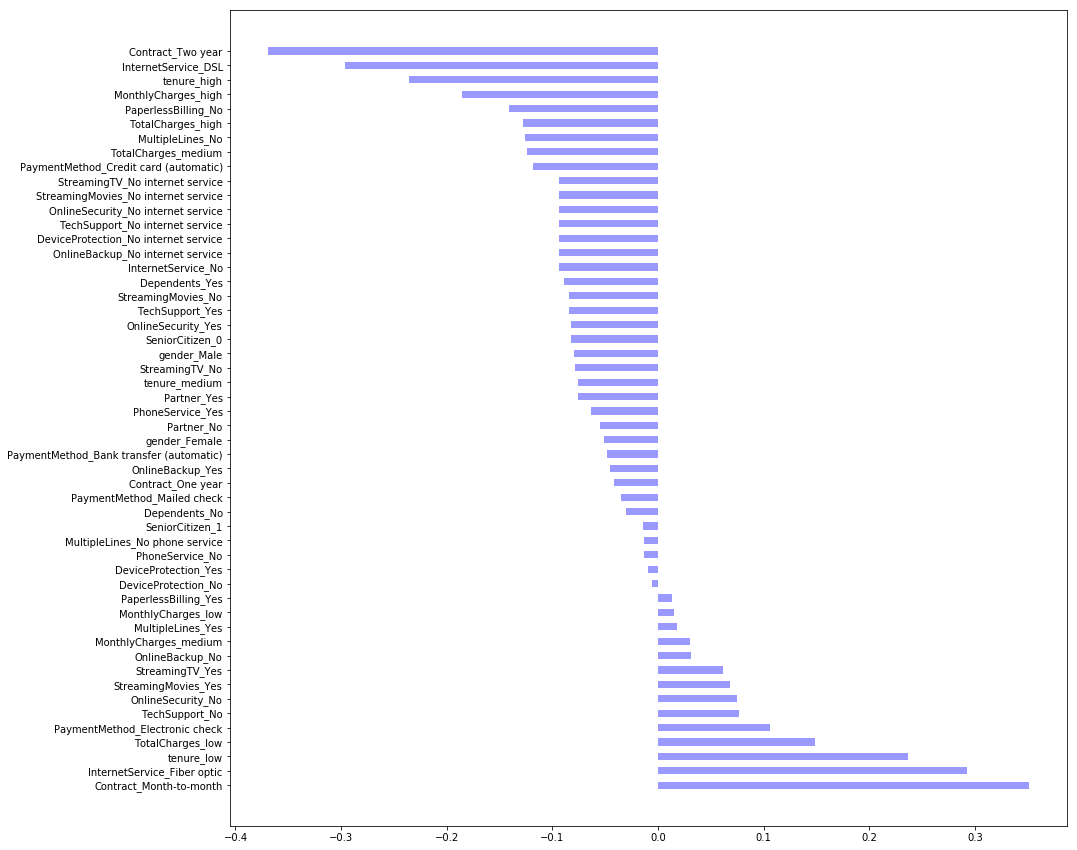

In [288]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

**The above plot gives us a clear view that which variables are mostv importatnt for prediction of churn of client**

# Probability Estimation